# Tugas 4

## Soal 1

### Graph Berarah

In [1]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx


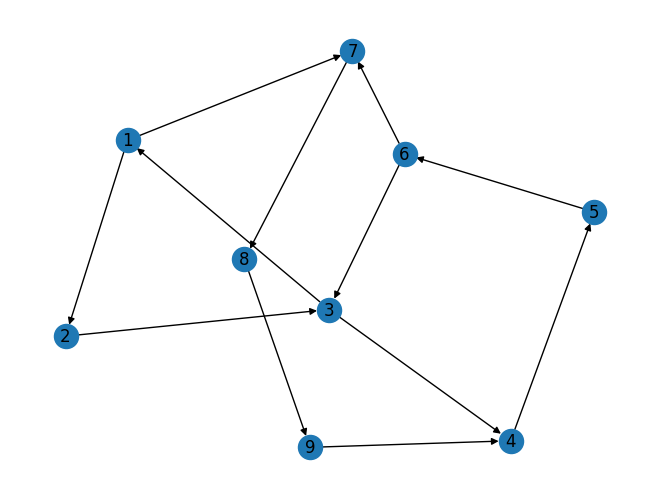

In [4]:
G = nx.DiGraph()
G.add_edges_from([(1,2),(1,7),(2,3),(3,1),(3,4),(4,5),(5,6),(6,3),(6,7),(7,8),(8,9),(9,4)])
nx.draw(G,with_labels=True,arrows=True)

### Hitung menggunakan pagerank menggunakan manual

In [50]:
d = 0.85 # Damping factor
max_iter = 100 # iterasi maksimum
tolerance = 1.0e-6 # Toleransi konvergensi
N = len(G.nodes())
pagerank = dict.fromkeys(G.nodes(), 1.0/N)
for i in range(max_iter):
    diff = 0
    for node in G.nodes():
        rank = 1 - d
        for neighbor in G.neighbors(node):
            rank += d * pagerank[neighbor] / G.degree(neighbor)
        diff += abs(pagerank[node] - rank)
        pagerank[node] = rank
    if diff < N * tolerance:
        break

print("Manual pagerank:\n", pagerank)

Manual pagerank:
 {1: 0.31351500064548044, 2: 0.2157053119363109, 7: 0.2535547851552312, 3: 0.30920213388508444, 4: 0.24837521141712537, 5: 0.2314713016094193, 6: 0.2875459759112293, 8: 0.2436584755734343, 9: 0.22037297656818555}


### Hitung menggunakan pagerank menggunakan networkx

In [5]:
Dc = nx.pagerank(G, max_iter=100)
Dc

{1: 0.06602158965000457,
 2: 0.04472597327590684,
 7: 0.10617224673079734,
 3: 0.11612986713294254,
 4: 0.15743212897990083,
 5: 0.1504851900296921,
 6: 0.1445778919839476,
 8: 0.10691223297914718,
 9: 0.10754287923766087}

In [6]:
sorted(Dc,key=Dc.get , reverse=True)

[4, 5, 6, 3, 9, 8, 7, 1, 2]

## Soal 2

### Pengertian

Text summarization adalah teknik pemrosesan bahasa alami yang bertujuan untuk membuat ringkasan atau abstraksi dari teks yang panjang. Tujuan dari text summarization adalah untuk menyajikan informasi penting dari teks dengan cara yang singkat dan mudah dipahami, sehingga memudahkan pembaca untuk memperoleh pemahaman umum mengenai isi teks tanpa harus membaca keseluruhan teks.

### Library

Pada penggunaan text sumarization menggunakan library yang telah disediakan seperti dibawah ini

In [26]:
!pip install PyPDF2
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import numpy as np
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### Baca Dokumen

fungsi dari code dibawah ini adalah untuk membaca data dalam format txt maupun pdf

In [32]:
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

### Function Untuk Tokenisasi Dokumen Users

Proses tokenisasi adalah langkah awal dalam pemrosesan bahasa alami, di mana teks diubah menjadi kumpulan token atau kata-kata. Fungsi dari proses tokenisasi adalah untuk memisahkan teks menjadi unit-unit yang lebih kecil, sehingga memudahkan pemrosesan selanjutnya seperti analisis sentimen, identifikasi topik, dan text summarization

In [33]:
def tokenize(document):
    # Tokenisasi menggunakan libary  PunktSentenceTokenizer
    # yang dipanggil sebagai  sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Proses Penginputan Dokumen


Proses penginputan dokumen dari user

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
document = readDoc('/content/drive/MyDrive/PROSAINDATA/teks.txt')
print('The length of the file is:', end=' ')
print(len(document))

The length of the file is: 612


### Generate List untuk Setiap Kata pada Dokumen

In [35]:
sentences_list = tokenize(document)

# Menampilkan jumlah memori yang digunakan untuk list
print('Ukuran list dalam bytes: {}'.format(sys.getsizeof(sentences_list)))

# Menampilkan ukuran satu list
print('Ukuran satu list dalam bytes: {}'.format(sys.getsizeof(sentences_list[0])))

Ukuran list dalam bytes: 112
Ukuran satu list dalam bytes: 128


### Print Tipe Data dan Analisis Elemen dalam Kalimat

In [ ]:
print(type(sentences_list))
print('Ukuran list "sentences": {}'.format(len(sentences_list)))

### Print Elemen dalam List

In [36]:
for i in sentences_list:
    print(i)

Tuhan pasti punya alasan telah memisahkan siang dan malam di tapal batas senja.
Ketika mata cahaya mulai meredup, bunga-bunga dan dedaunan ikut menguncup dan naluri seolah memaksa semua makhluk takluk merunduk.
Betapa bersahaja sebuah senja, begitu tenang dan agung.
Tidak ada gejolak yang benar-benar menghentak di rembang senja, kecuali sebuah paradoks yang indah.
Dimana langit yang tenang temaram diterangi semburat warna api matahari yang enggan terbenam.
Aku selalu takjub dengan sifat mendua dari pengalaman ini.
Seolah menyaksikan sebuah pagelaran epik yang diam-diam berlangsung dalam gerakan lambat..


### Generate term-document matrix (TD matrix) dari data

CountVectorizer() Menghasilkan matrix dimana matrix itu berasal dari kata-kata pada dokumen.

Misalkan: 'hari ini cerah setelah kemarin mendung', 'jakarta hari kemarin mendung'

Maka : ['cerah', 'hari', 'ini', 'jakarta', 'kemarin', 'mendung', 'setelah']

In [37]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [39]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <7x72 sparse matrix of type '<class 'numpy.int64'>'
	with 83 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['ada' 'agung' 'aku' 'alasan' 'api' 'batas' 'begitu' 'benar' 'berlangsung'
 'bersahaja' 'betapa' 'bunga' 'cahaya' 'dalam' 'dan' 'dari' 'dedaunan'
 'dengan' 'di' 'diam' 'dimana' 'diterangi' 'enggan' 'epik' 'gejolak'
 'gerakan' 'ikut' 'indah' 'ini' 'kecuali' 'ketika' 'lambat' 'langit'
 'makhluk' 'malam' 'mata' 'matahari' 'memaksa' 'memisahkan' 'mendua'
 'menghentak' 'menguncup' 'menyaksikan' 'meredup' 'merunduk' 'mulai'
 'naluri' 'pagelaran' 'paradoks' 'pasti' 'pengalaman' 'punya' 'rembang'
 'sebuah' 'selalu' 'semburat' 'semua' 'senja' 'seolah' 'siang' 'sifat'
 'takjub' 'takluk' 'tapal' 'telah' 'temaram' 'tenang' 'terbenam' 'tidak'
 'tuhan' 'warna' 'yang']
[[0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0

In [38]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         0.29240381 0.         0.29240381
  0.         0.         0.         0.         0.         0.
  0.         0.         0.20746925 0.         0.         0.
  0.24272028 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.29240381 0.
  0.         0.         0.29240381 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.29240381 0.         0.29240381 0.         0.
  0.         0.         0.         0.20746925 0.         0.29240381
  0.         0.         0.         0.29240381 0.29240381 0.
  0.         0.         0.         0.29240381 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.43955754
  0.21977877 0.         0.31187921 0.         0.21977877 0.
  0.         0.         0.         0.         0.         0.
  0.   

In [42]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <72x7 sparse matrix of type '<class 'numpy.float64'>'
	with 83 stored elements in Compressed Sparse Column format>>


### Menentukan Rank untuk Setiap Kalimat Menggunakan textrank

In [43]:
nx_graph = nx.from_scipy_sparse_array(res_graph)

In [44]:
ranks = nx.pagerank(nx_graph)

# Analisis tipe data dari rank
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print ranks
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 360
0 0.13911371917455453
1 0.13591638693345517
2 0.1518502310147031
3 0.15057805040184644
4 0.13985665728121427
5 0.14285714285714285
6 0.13982781233708386


### Menemukan Kalimat Penting dan Menentukan Kesimpulan

In [45]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [46]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

temp_array = []

# Jika semua kalimat memiliki rank yang sama. Maka kalimat tersebut dianggap sama
# Mengambil kalimat manapun tidak ada masalah
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# Jika kalimat memiliki rank yang berbeda
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

### Menjadikan Kesimpulan ke dalam File Baru


In [47]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Betapa bersahaja sebuah senja, begitu tenang dan agung. Tidak ada gejolak yang benar-benar menghentak di rembang senja, kecuali sebuah paradoks yang indah.


<function TextIOWrapper.close()>

In [49]:
for i in sentence_list:
    print(i)

Betapa bersahaja sebuah senja, begitu tenang dan agung.
Tidak ada gejolak yang benar-benar menghentak di rembang senja, kecuali sebuah paradoks yang indah.
